In [ ]:
import numpy as np
a = [[ 8, 3, -3], [-2, -8, 5], [3, 5, 10]]

#find diagonal coefficients
diag = np.diag(np.abs(a))

#find row sum without diagonal
off_diag = np.sum(np.abs(a), axis = 1) - diag

if np.all(diag > off_diag):
  print('matrix is diagonally dominant')
else: 
  print('NOT diagonally dominant')


In [ ]:
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.01
converged = False
x_old = np.array([x1, x2, x3])

In [ ]:
print('Iteration result')
print(' k, x1, x2, x3')
for k in range (1, 50):
  x1 = (14-3*x2+3*x3)/8
  x2 = (5+2*x1-5*x3)/(-8)
  x3 = (-8-3*x1-5*x2)/10
  x = np.array([x1 ,x2, x3]) 
  #check if it is smaller than threshold
  dx = np.sqrt(np.dot(x-x_old, x-x_old))

  print("%d, %.4f, %.4f, %.4f"%(k, x1, x2, x3))
  if dx < epsilon:
    converged = True
    print('Converged!')
    break

  #assign the latest x value o the old value
  x_old = x

  if not converged:
    print('Not converged, increase the # of the iterations')

In [2]:
import numpy as np

A = np.array([[4, 3, -5],
              [-2, -4, 5],
              [8, 8, 0]])
y = np.array([2, 5, -3])

x = np.linalg.solve(A, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


In [3]:
A_inv = np.linalg.inv(A)

x = np.dot(A_inv, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


In [4]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
#generate x dan y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

#assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

#turn y into a column vector
y = y[:, np.newaxis]

#direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)), A.T)),y)
print(alpha)



[[1.57715974]
 [0.97209266]]


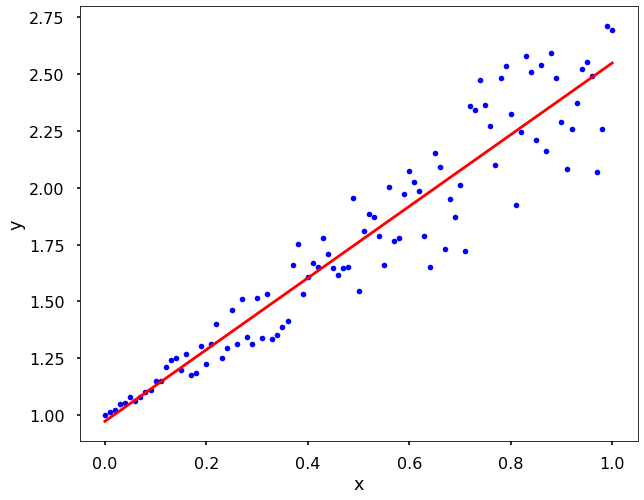

In [5]:
#plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.57715974]
 [0.97209266]]


In [7]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.57715974]
 [0.97209266]]


In [10]:
#generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

def func(x, a, b):
  y = a*x + b
  return y

  alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
  print(alpha)